In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('./mem_true/src_mass/df_mass.csv')
df['Time'] = df['Time'] - df['Memory Constraint Time'] + df['Heft Time']

In [49]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 1)
gs.update(wspace=0.025, hspace=0.15)

def draw_bar(gid, xaxis, yaxis, d):
    dd = ['', 'a', 'b', 'c', 'd']
    plt.subplot(gs[gid-2])
    ax = sns.barplot(x=xaxis, y=yaxis, hue="Type", data=d[d['gid'] == gid], ci = None)
    plt.ylabel('Task ' + dd[gid])
    if gid < 4:
        ax.axes.get_xaxis().set_visible(False)
        ax.get_legend().remove()
    else:
        plt.xlabel('')
        ax.legend(loc='lower center', bbox_to_anchor= (0.5,-0.5), ncol=4, borderaxespad=0, frameon=False)

def draw_stacked_bar(gid, xaxis, yaxis1, yaxis2, d):
    dd = ['', 'a', 'b', 'c', 'd']
    plt.subplot(gs[gid-2])
    ax = sns.barplot(x=xaxis, y=d[yaxis1],
                     hue="Type", data=d[d['gid'] == gid], ci = None, palette=sns.color_palette('pastel'))
    ax = sns.barplot(x=xaxis, y=d[yaxis2],
                     hue="Type", data=d[d['gid'] == gid], ci = None, palette=sns.color_palette())
    # ax.set(ylim=(0,1))
    plt.ylabel('Task ' + dd[gid])
    if gid < 4:
        ax.axes.get_xaxis().set_visible(False)
        ax.get_legend().remove()
    else:
        plt.xlabel('')
        # ax.get_legend().remove()
        ax.legend(['CPF', 'ICRB', 'STO', 'Rand'], loc='lower center', bbox_to_anchor= (0.5,-0.5), ncol=4, borderaxespad=0, frameon=False)

def draw_bars(bartype, dir):
    xaxis = 'Case'

    plt.figure(figsize = (40, 14))
    sns.set(font_scale = 2.75)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Helvetica'})
    
    if bartype == 'EDER':
        for gid in [2, 3, 4]:
            draw_bar(gid, xaxis, 'EDER', df)
        plt.savefig('./'+ dir + 'EDER.pdf', bbox_inches='tight')
    elif bartype == 'DOR':
        for gid in [2, 3, 4]:
            draw_bar(gid, xaxis, 'DOR', df)
        plt.savefig('./'+ dir + 'DOR.pdf', bbox_inches='tight')
    elif bartype == 'Time':
        for gid in [2, 3, 4]:
            draw_bar(gid, xaxis, 'Time', df)
        plt.savefig('./'+ dir + 'Time.pdf', bbox_inches='tight')
    elif bartype == 'Time_heft':
        for gid in [2, 3, 4]:
            draw_stacked_bar(gid, xaxis, 'Time', 'Heft Time', df)
        plt.savefig('./'+ dir + 'Time_heft.pdf', bbox_inches='tight')
    else:
        for gid in [2, 3, 4]:
            draw_stacked_bar(gid, xaxis, 'Total Pct.', 'Calculation Pct.', df)
        plt.savefig('./'+ dir + 'PCT.pdf', bbox_inches='tight')

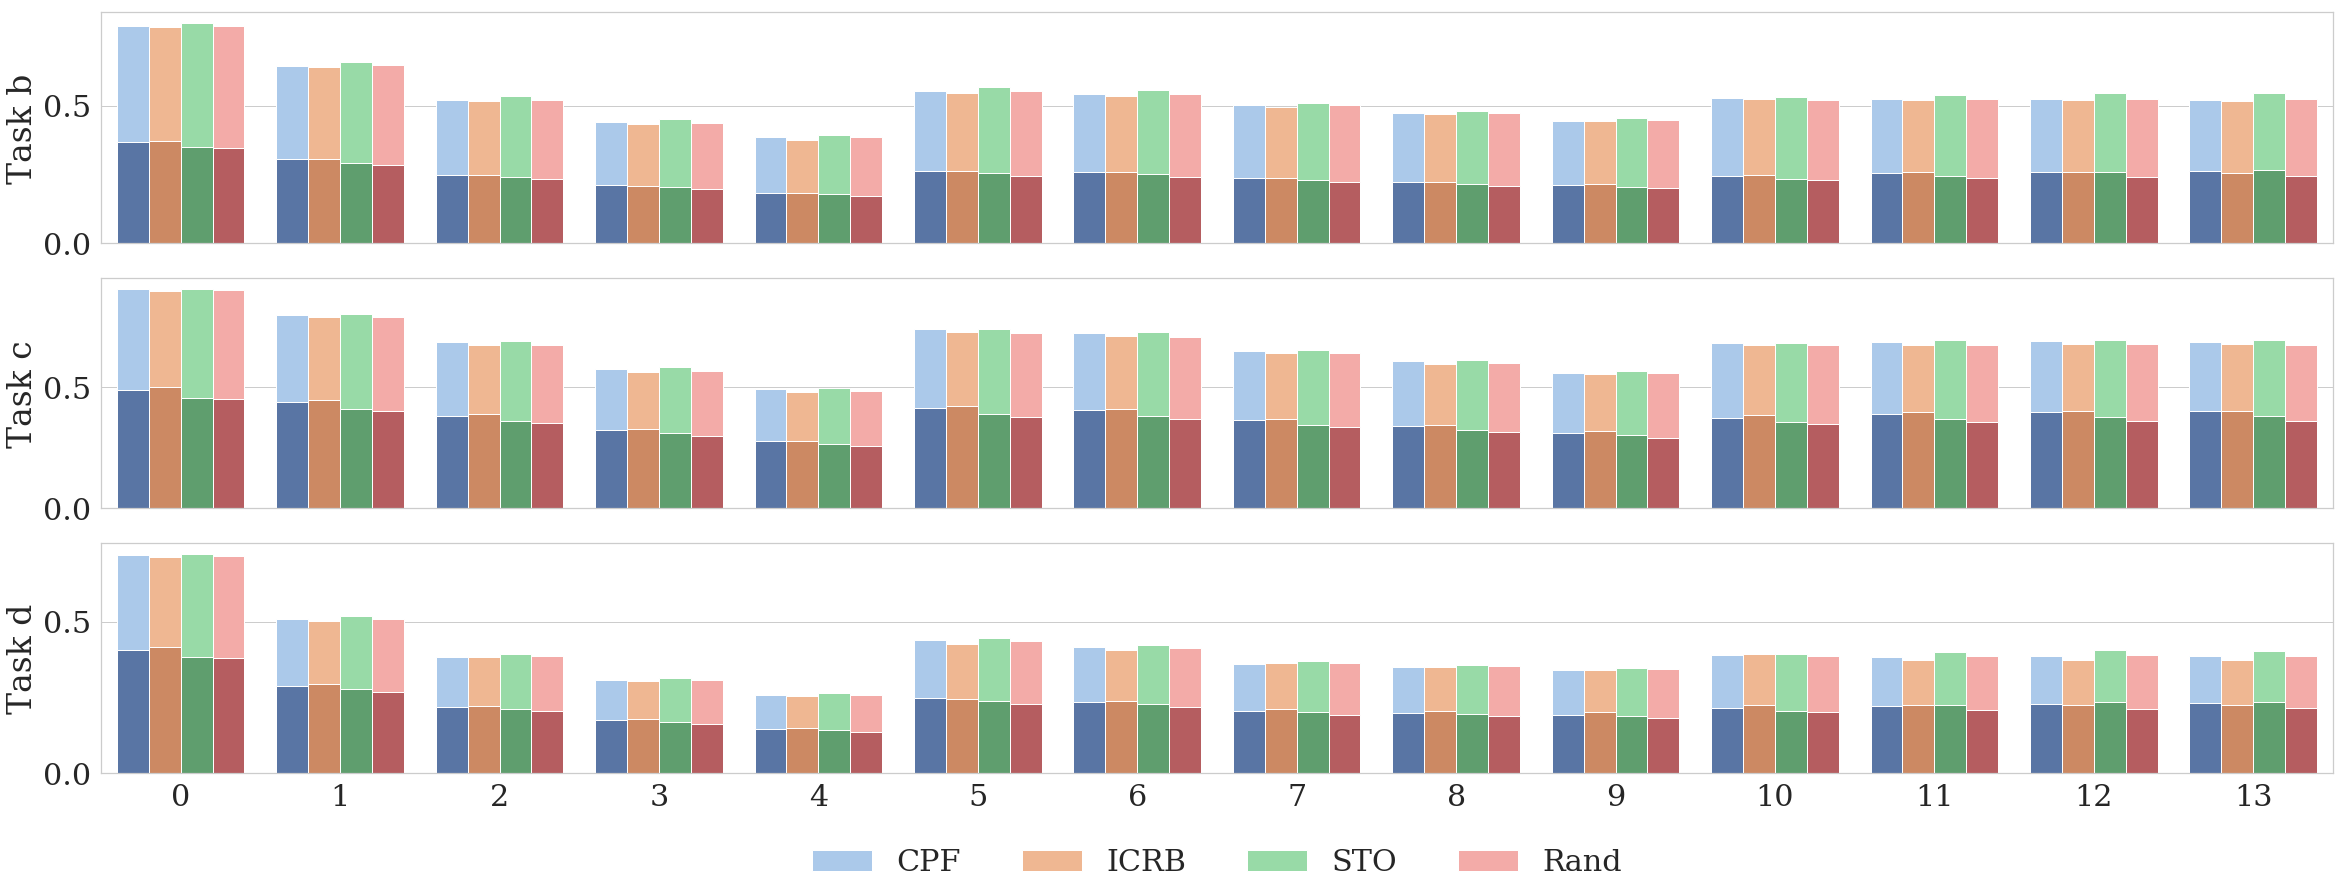

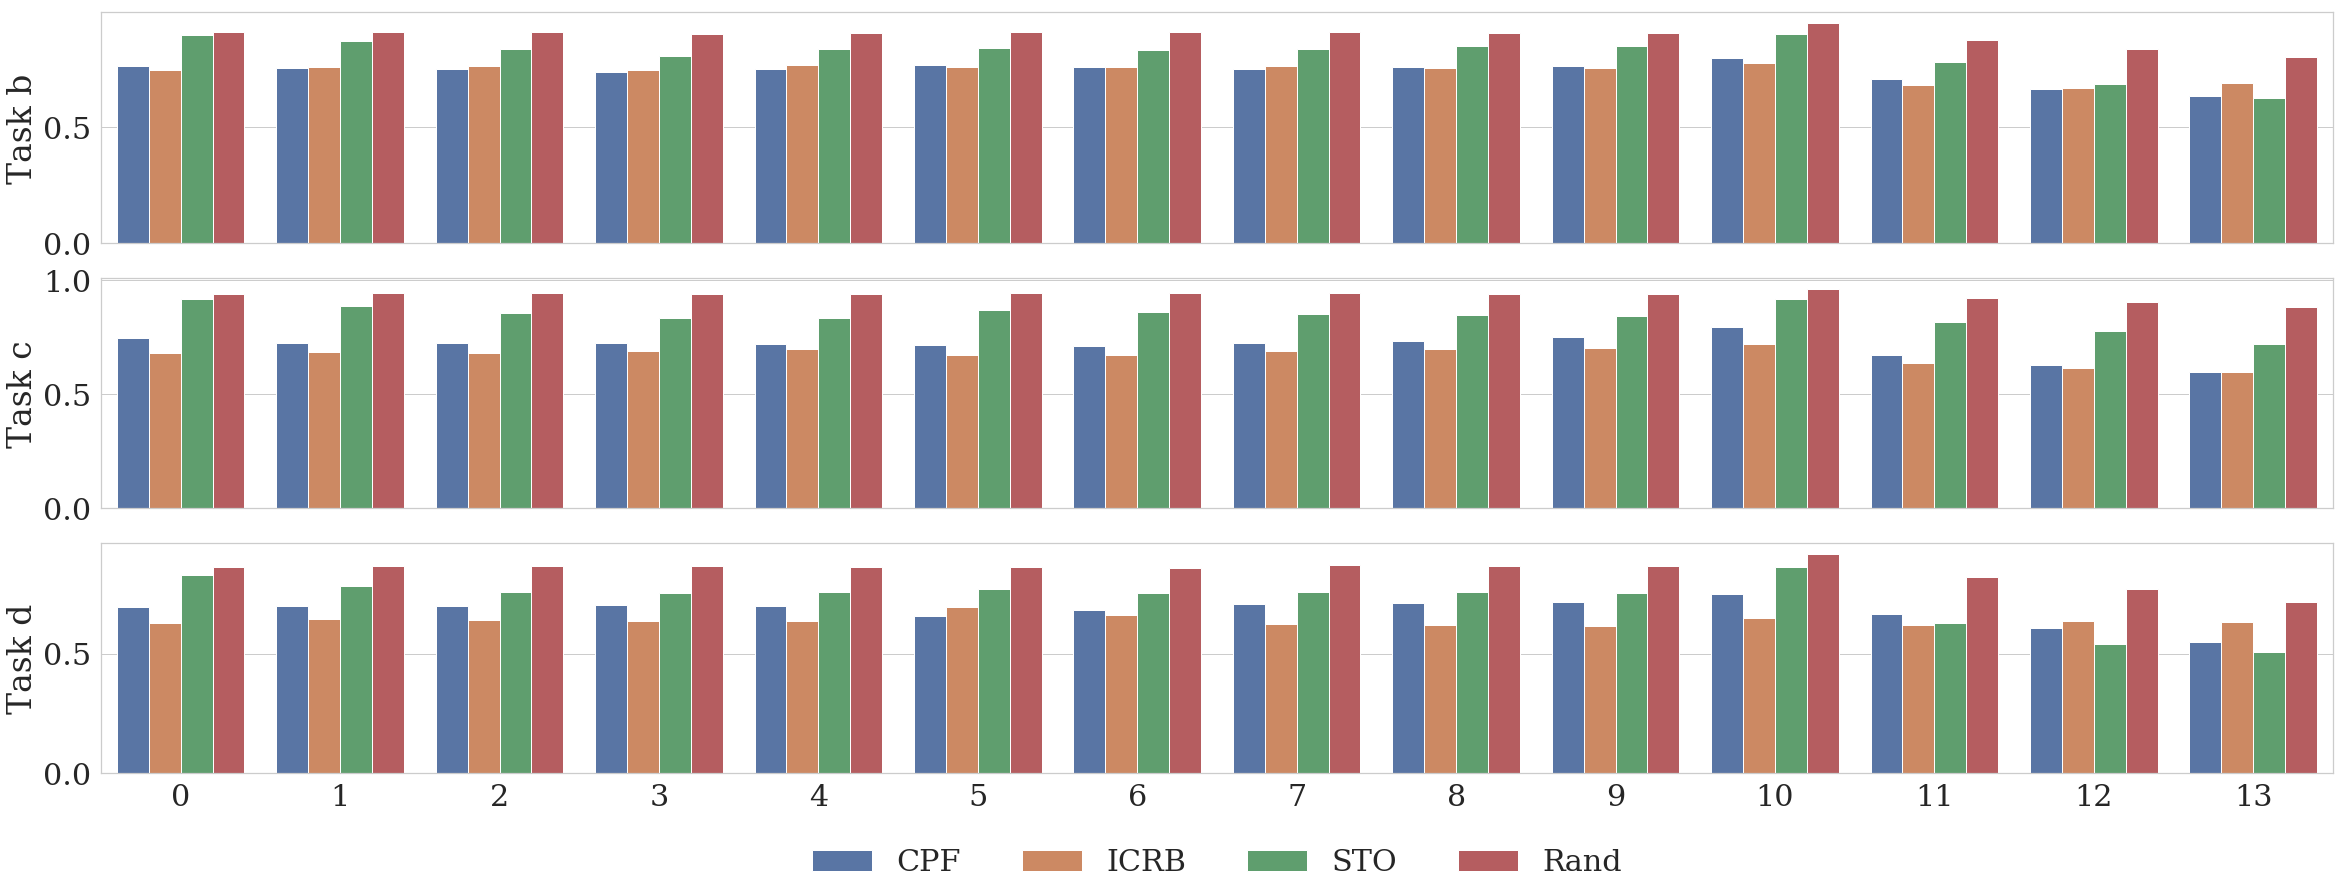

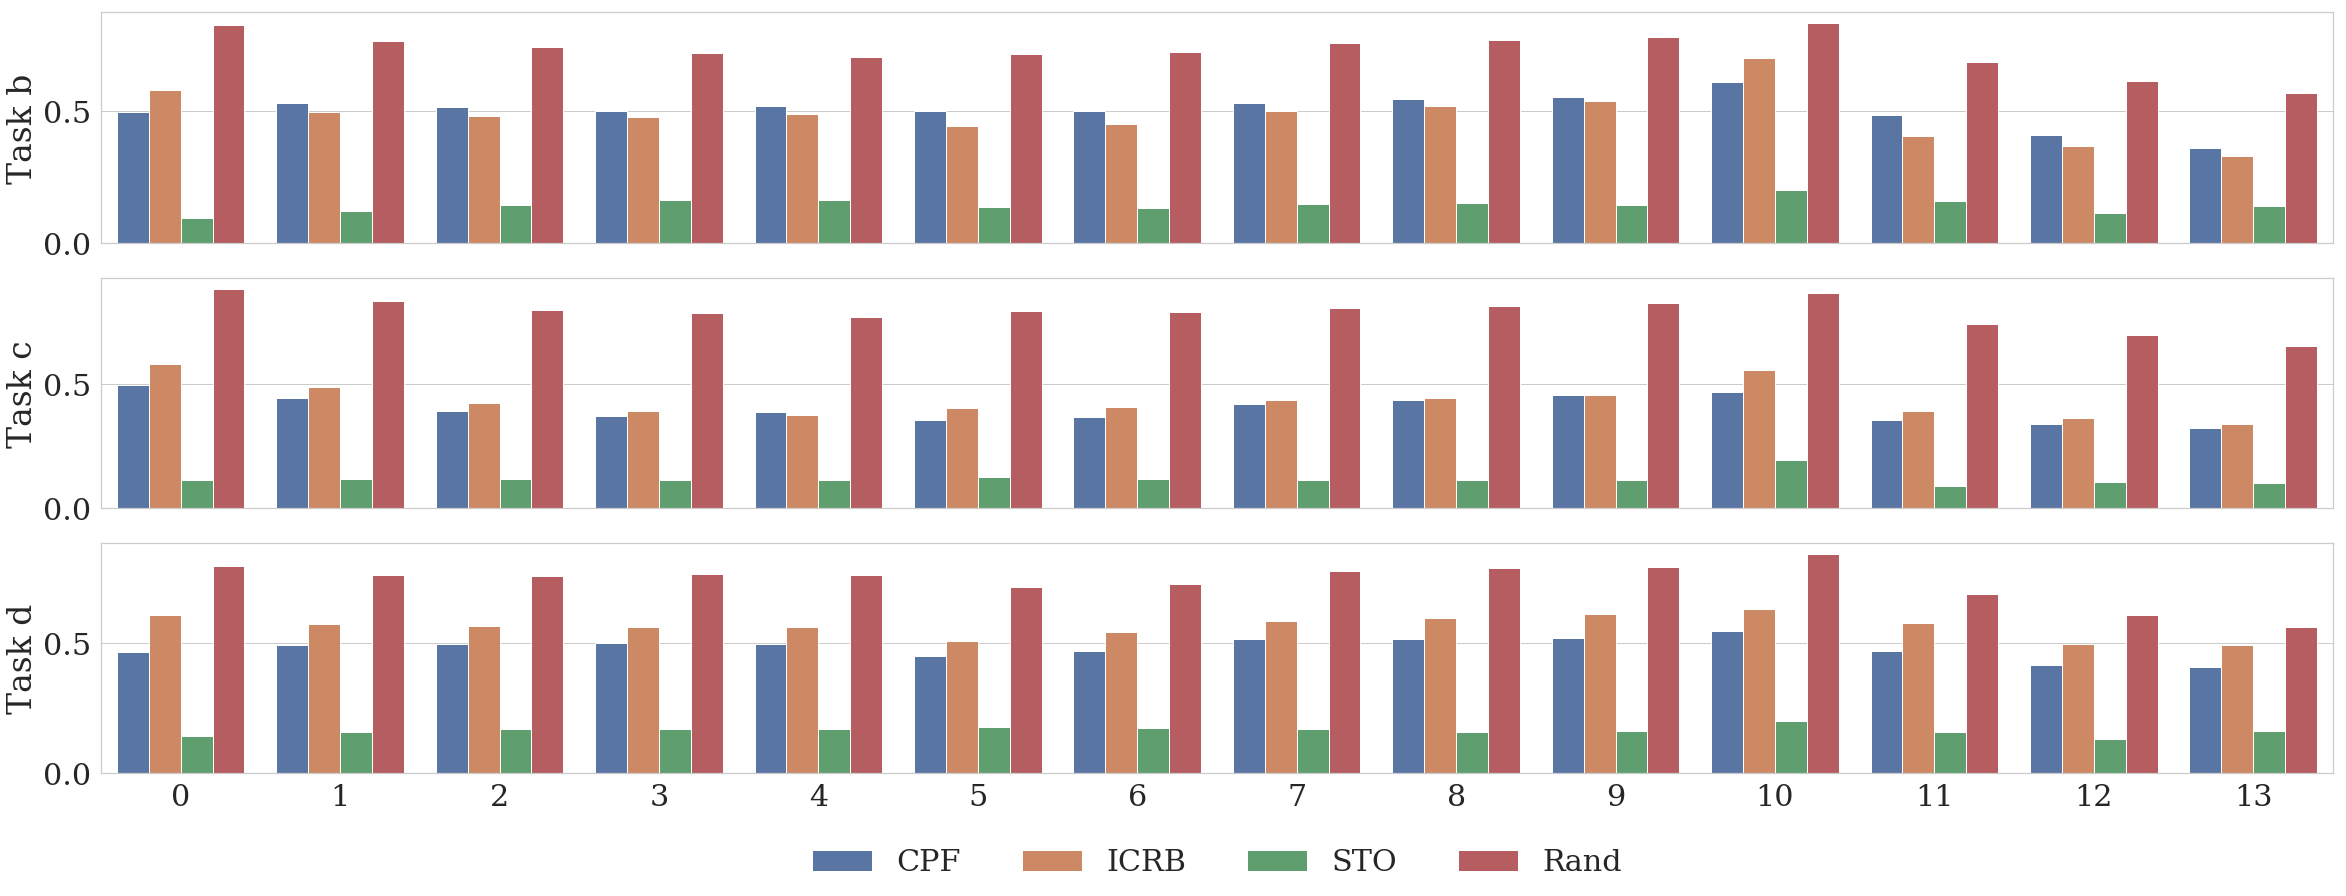

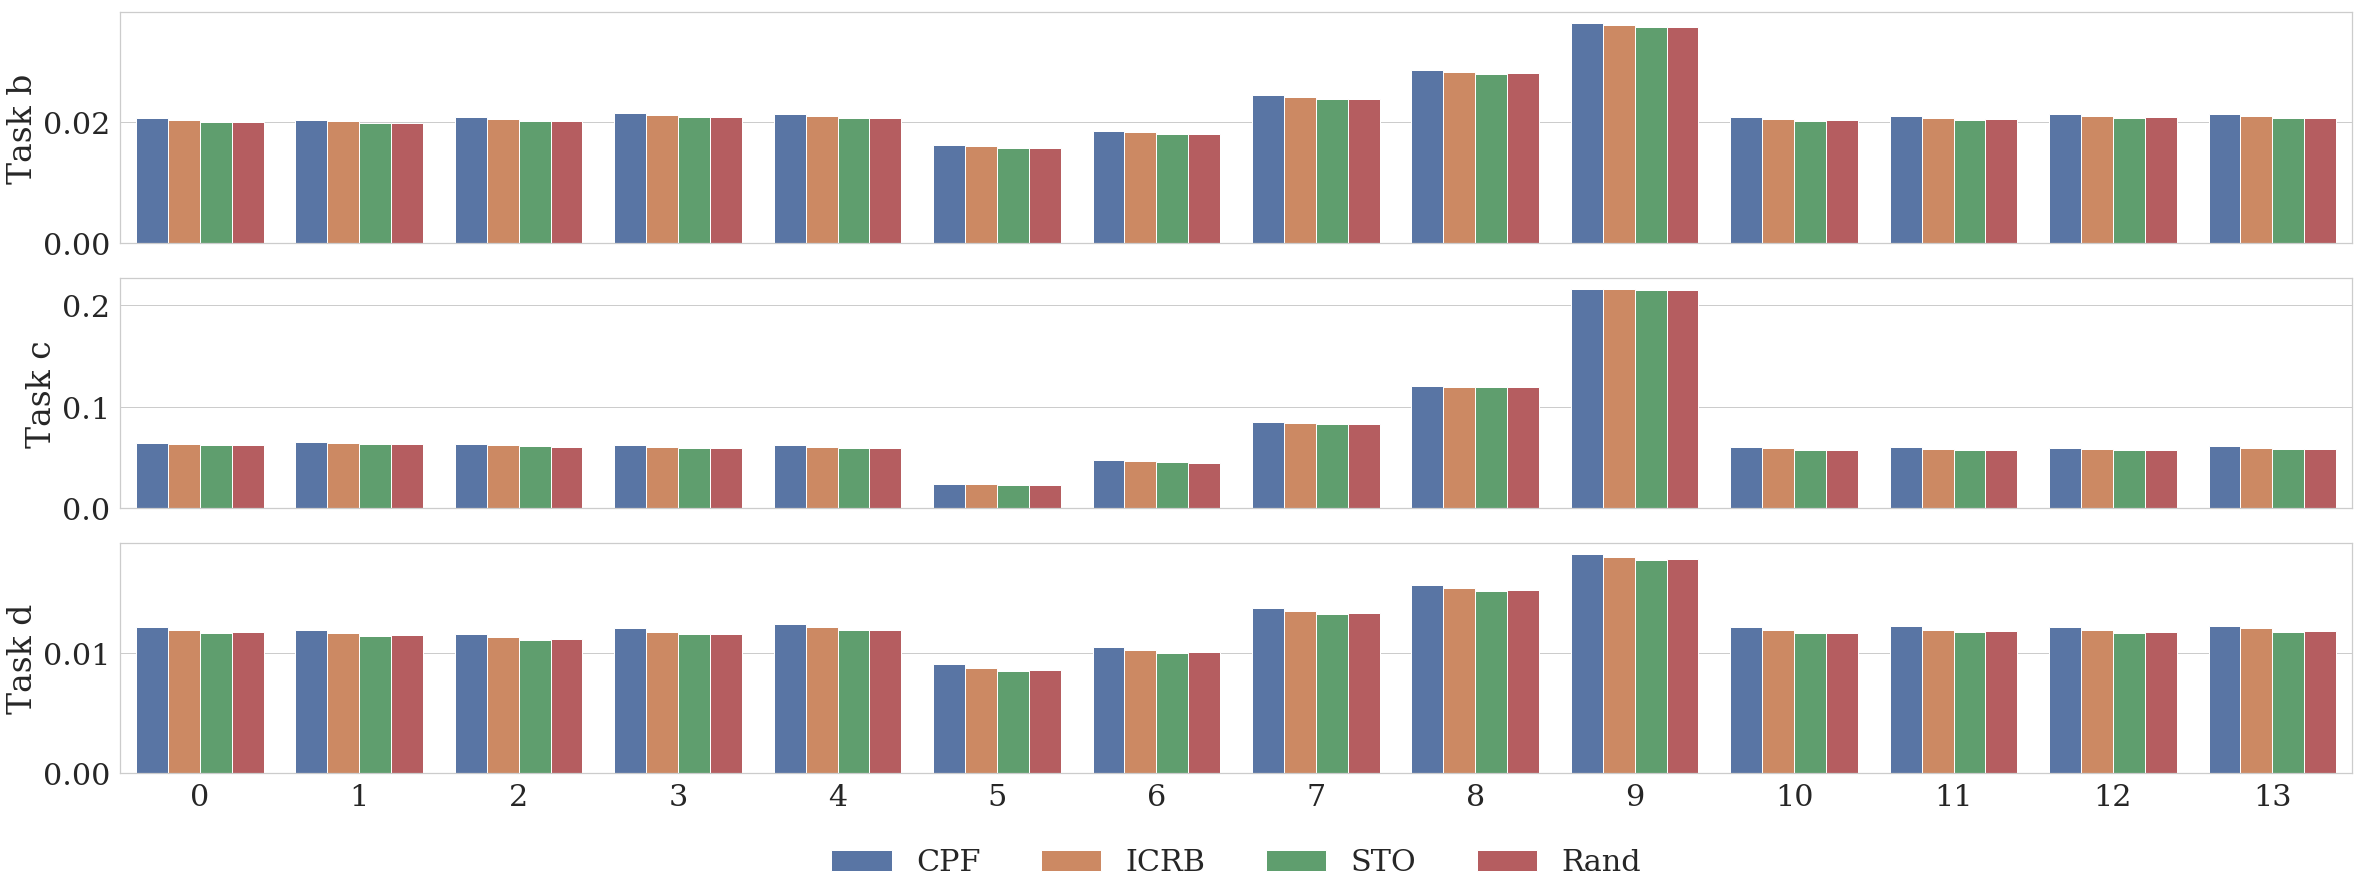

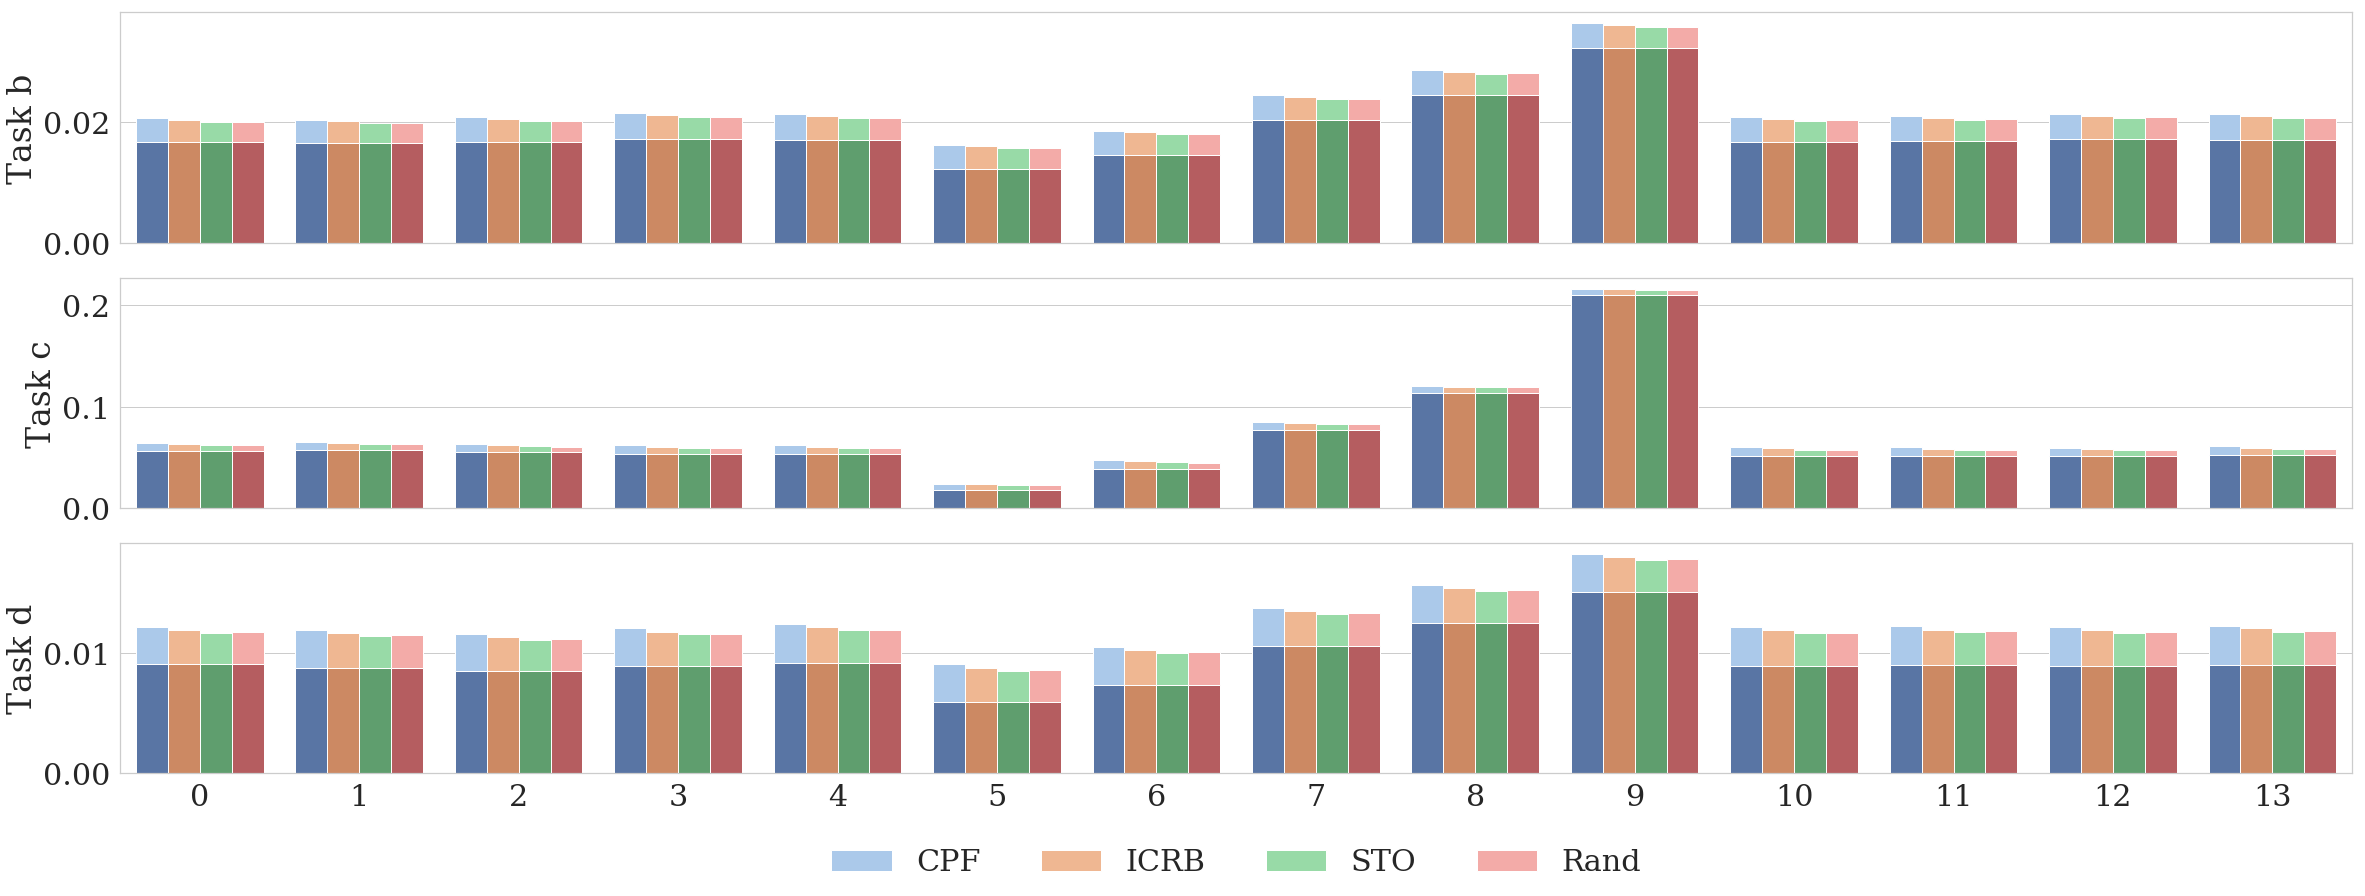

In [28]:
draw_bars('PCT', 'mem_true/src_mass/')
draw_bars('EDER', 'mem_true/src_mass/')
draw_bars('DOR', 'mem_true/src_mass/')
draw_bars('Time', 'mem_true/src_mass/')
draw_bars('Time_heft', 'mem_true/src_mass/')

In [23]:
def draw_six_bars(gid, xaxis, yaxis, d, dir):
    plt.figure(figsize = (25, 4))
    sns.set(font_scale = 2.75)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Helvetica'})
    dd = ['', 'a', 'b', 'c', 'd']
    ax = sns.barplot(x=xaxis, y=yaxis, hue="Type", data=d[d['gid'] == gid], ci = None)
    plt.ylabel('Task ' + dd[gid])
    ax.legend(loc='lower center', bbox_to_anchor= (0.5,-0.6), ncol=6, borderaxespad=0, frameon=False)
    plt.savefig('./' + dir + 'search_{}.pdf'.format(yaxis), bbox_inches = 'tight')

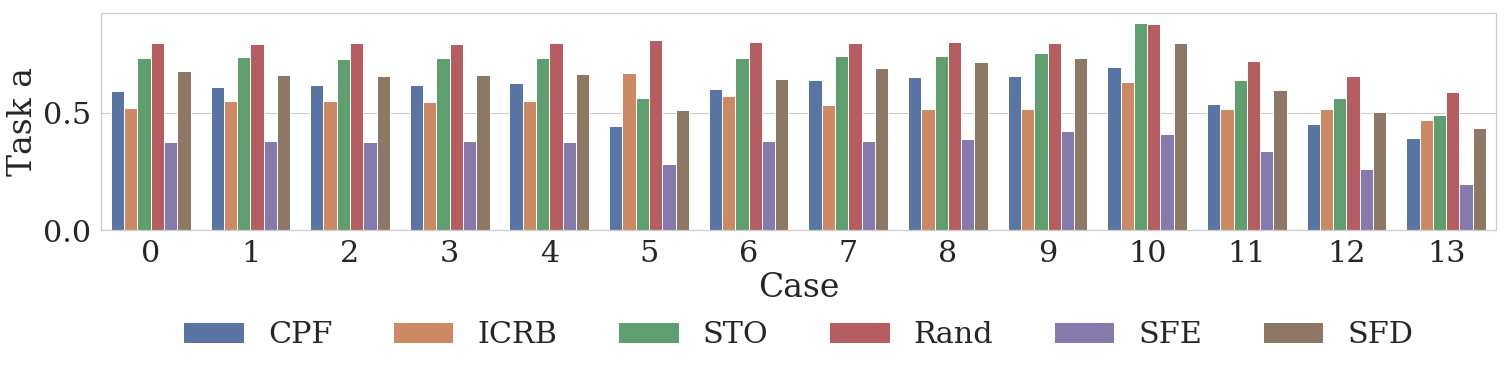

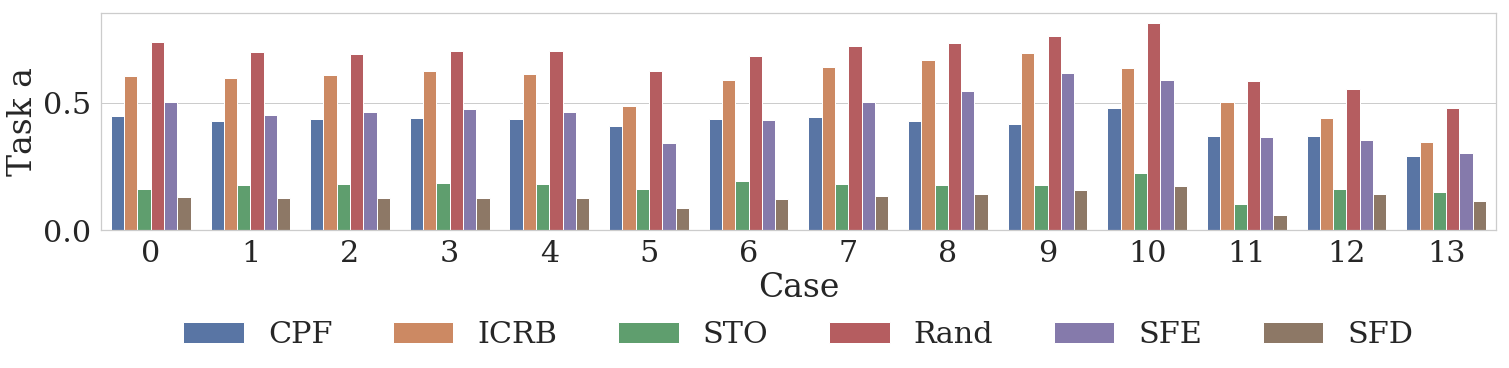

In [24]:
df = pd.read_csv('./mem_true/src1/df.csv')
draw_six_bars(1, 'Case', 'EDER', df, 'mem_true/src1/')
draw_six_bars(1, 'Case', 'DOR',  df, 'mem_true/src1/')

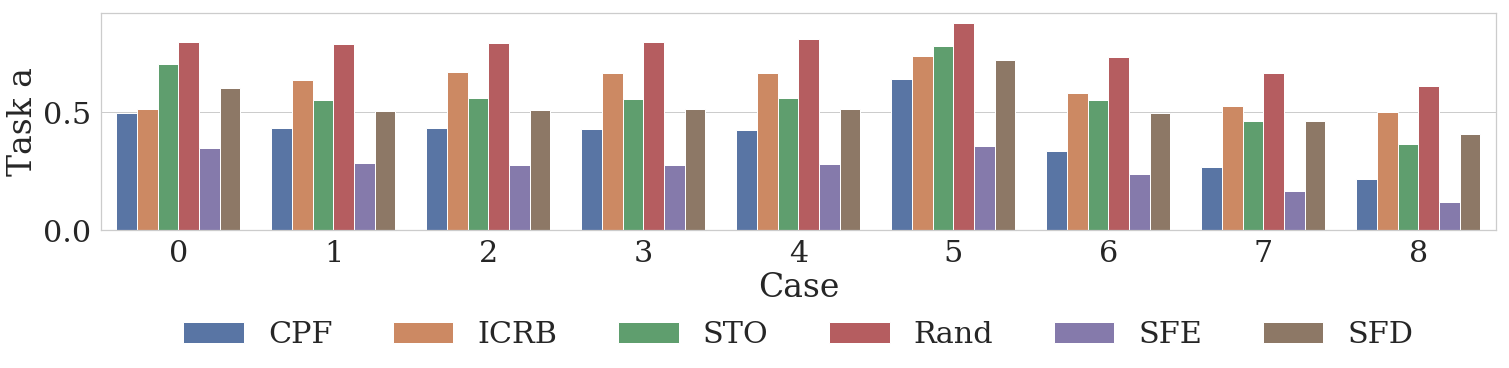

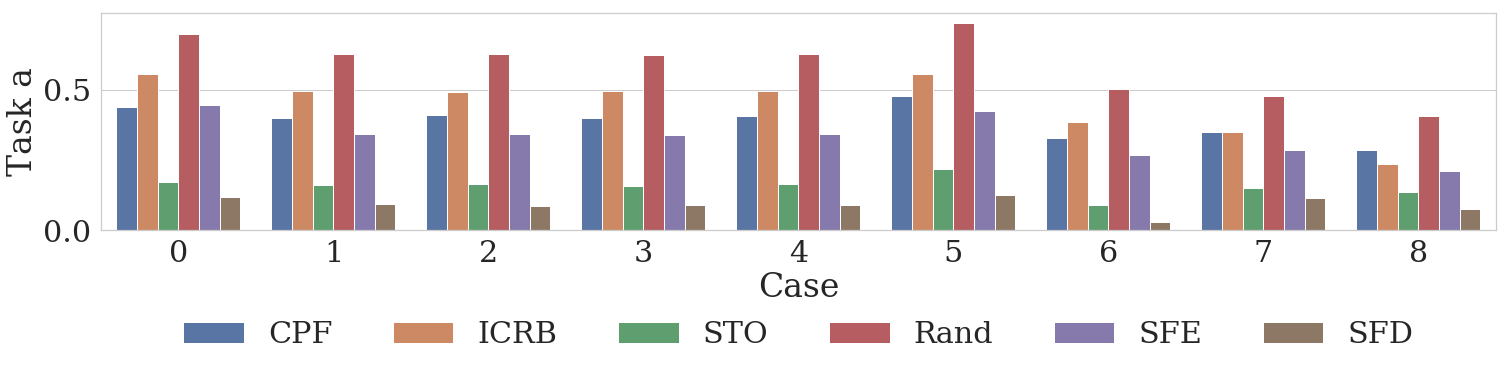

In [29]:
df = pd.read_csv('./mem_false/src1/df.csv')
draw_six_bars(1, 'Case', 'EDER', df, 'mem_false/src1/')
draw_six_bars(1, 'Case', 'DOR',  df, 'mem_false/src1/')

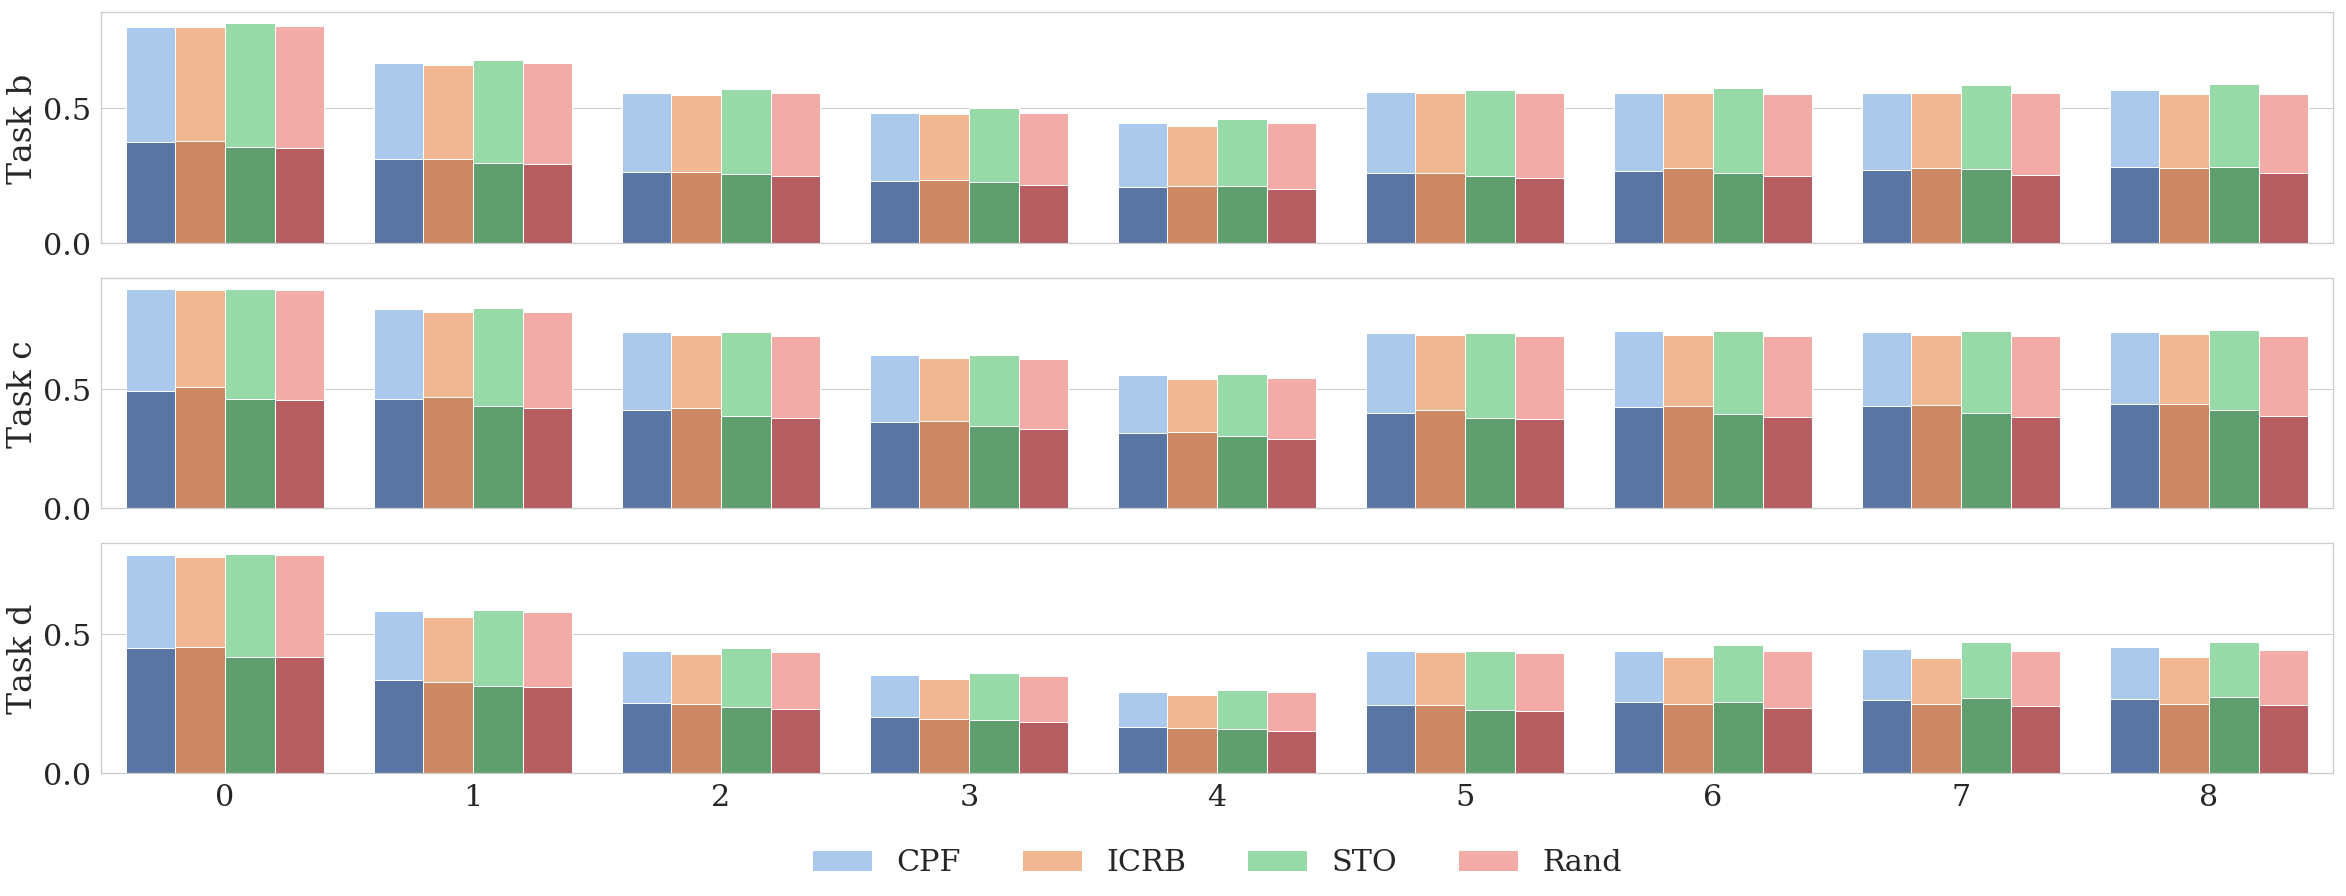

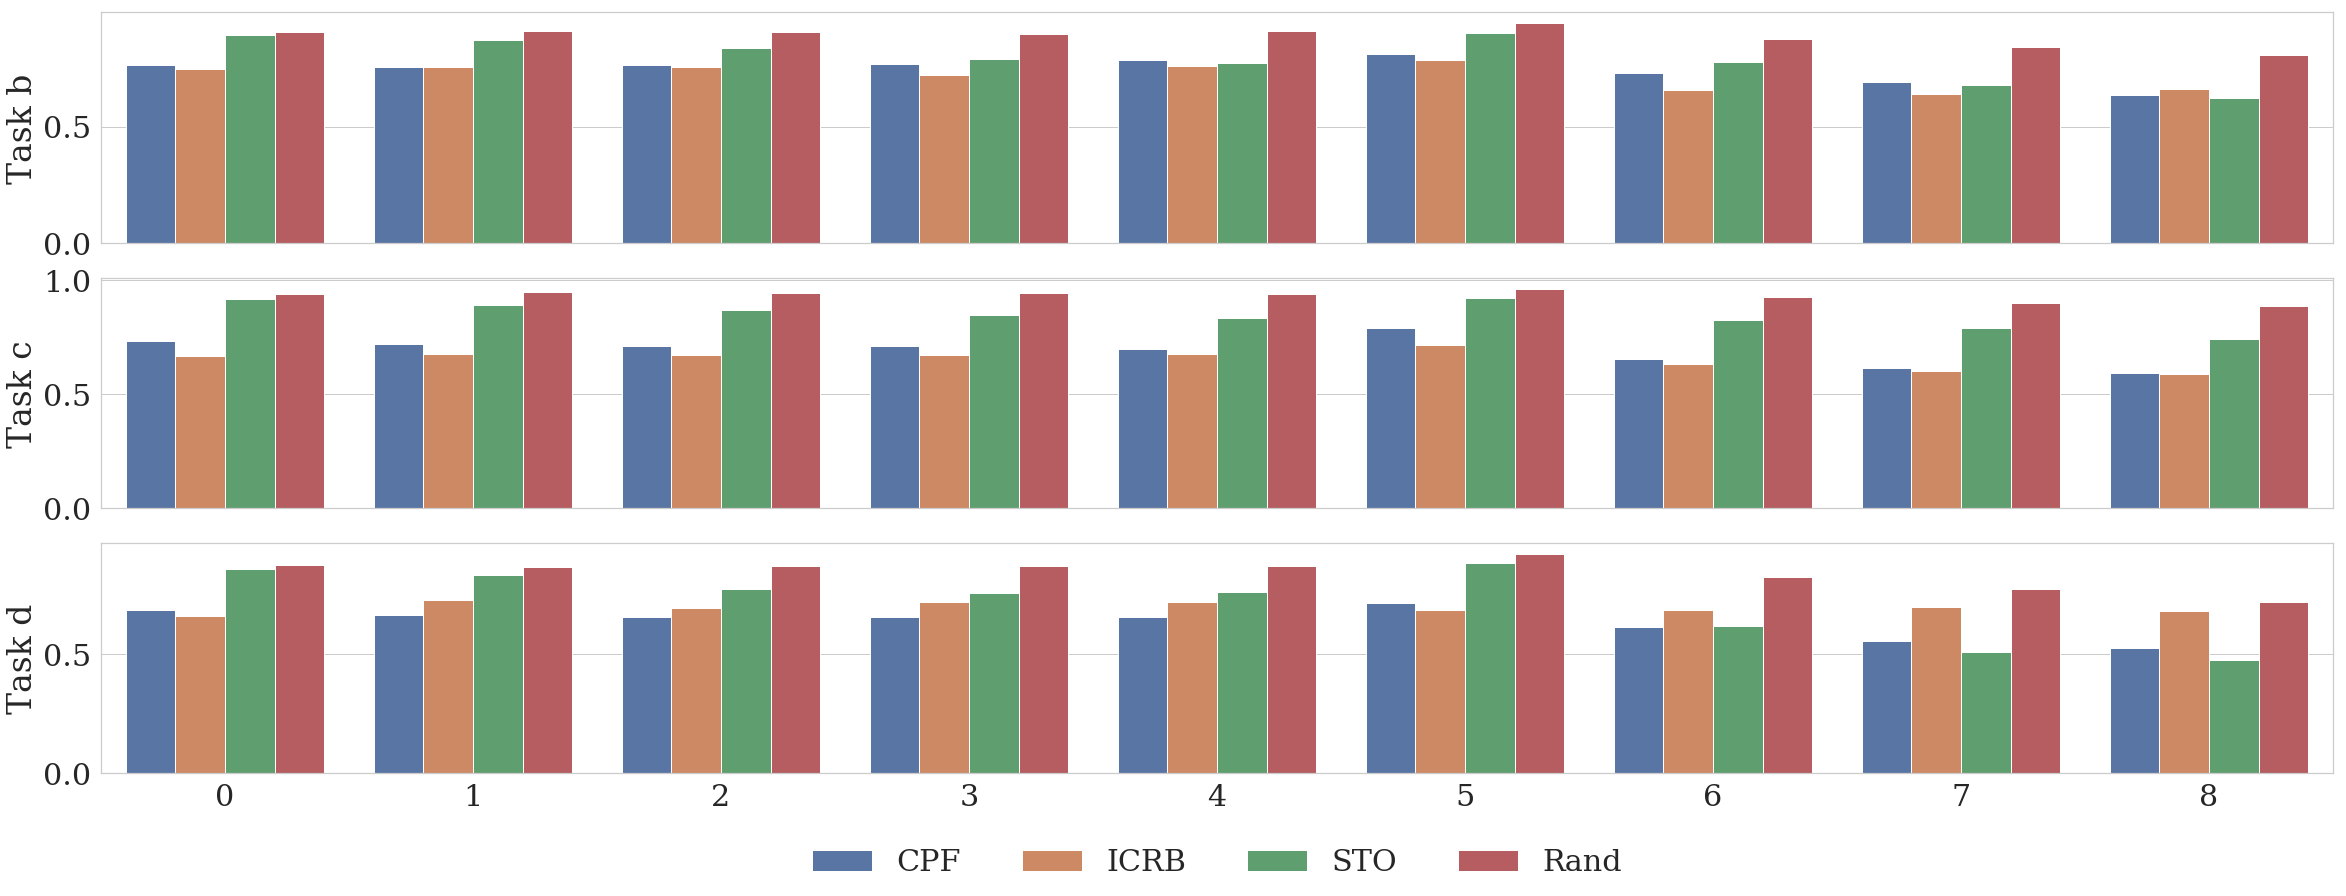

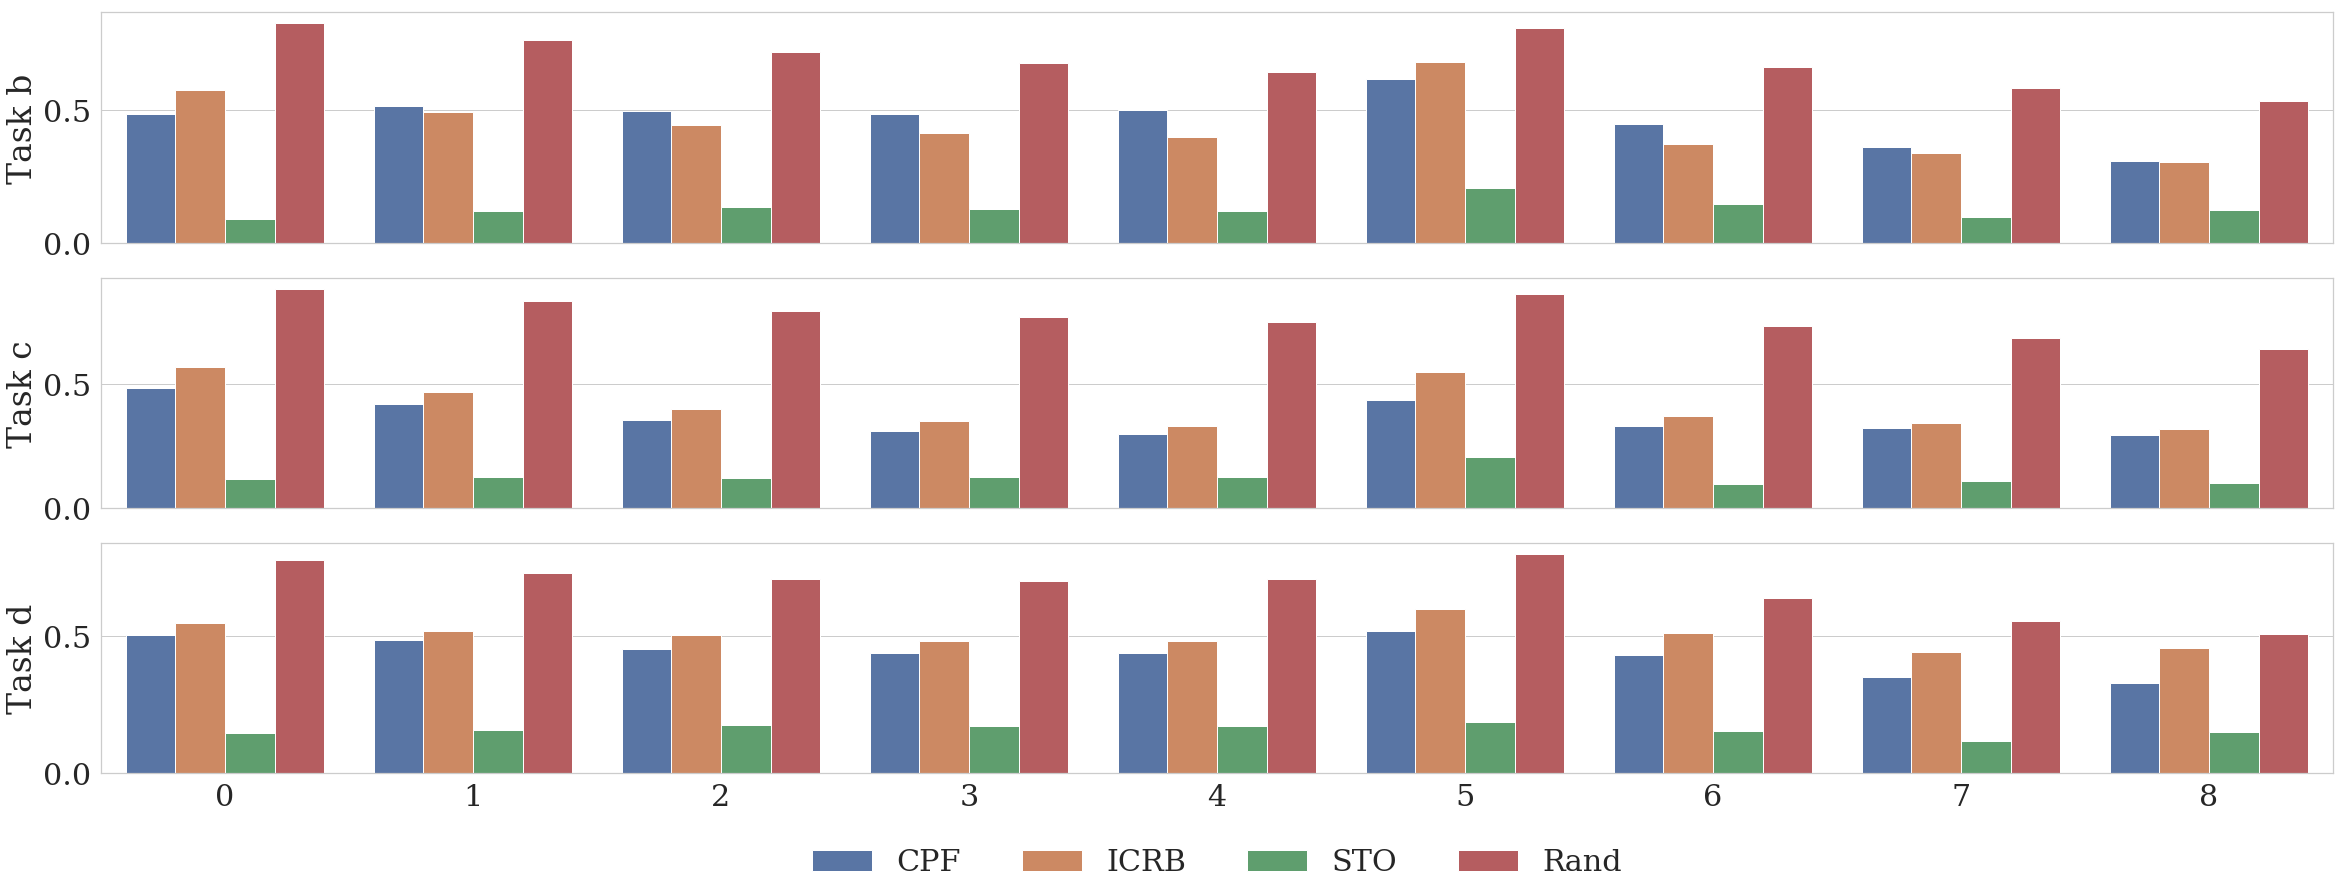

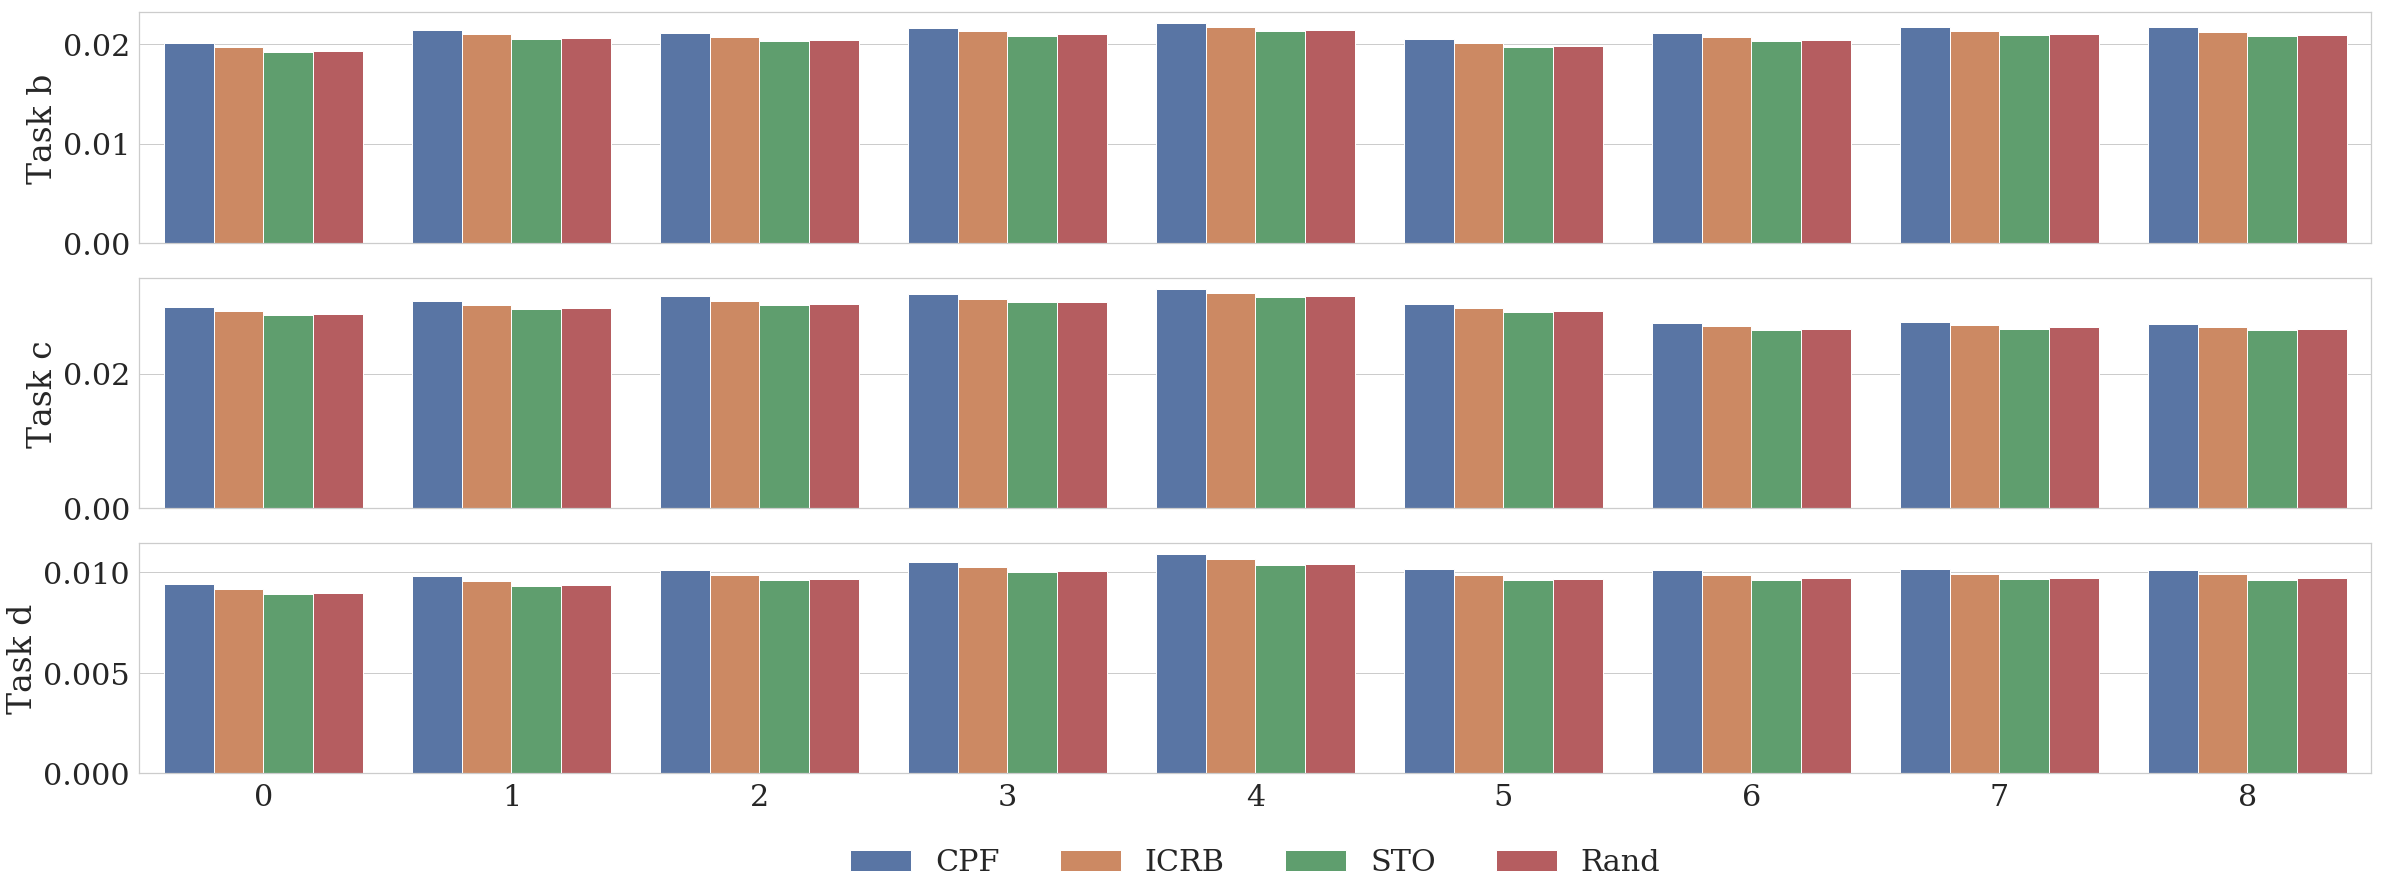

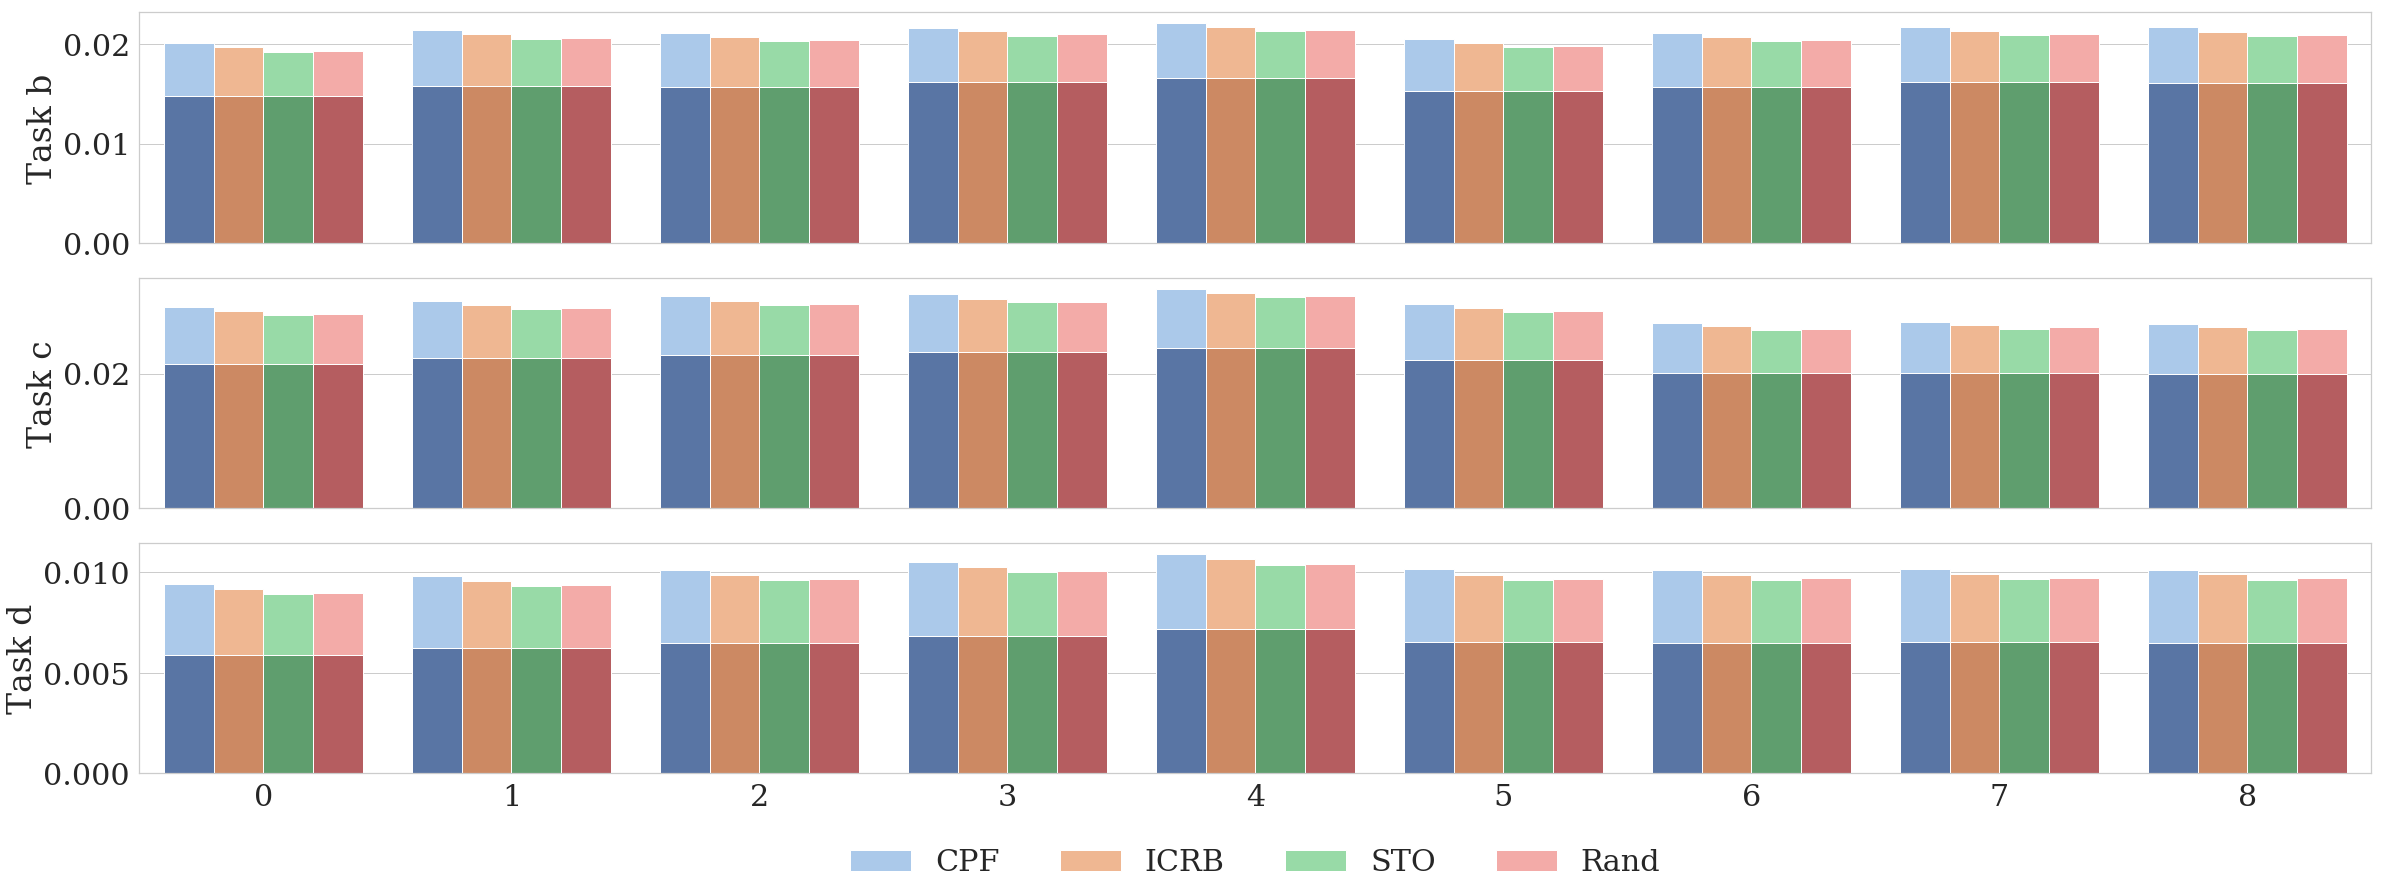

In [51]:
df = pd.read_csv('./mem_false/src_mass/df_mass.csv')

draw_bars('PCT', 'mem_false/src_mass/')
draw_bars('EDER', 'mem_false/src_mass/')
draw_bars('DOR', 'mem_false/src_mass/')
draw_bars('Time', 'mem_false/src_mass/')
draw_bars('Time_heft', 'mem_false/src_mass/')

In [44]:
def draw_maxcut_core_bar(d):
    plt.figure(figsize = (24, 6))
    sns.set(font_scale = 2.75)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
    dd = ['', 'a', 'b', 'c', 'd']
    ax = sns.barplot(x='gid', y='Maximum memory', hue="core", data=d, ci = None)
    plt.xticks(range(4), ('Task a', 'Task b', 'Task c', 'Task d'))
    plt.xlabel('')
    ax.legend(['1 core','2 cores','3 cores','4 cores','5 cores','6 cores'], loc='lower center', bbox_to_anchor= (0.5,-0.25), ncol=6, borderaxespad=0, frameon=False)
    plt.savefig('./mem/mem_core.pdf', bbox_inches='tight')

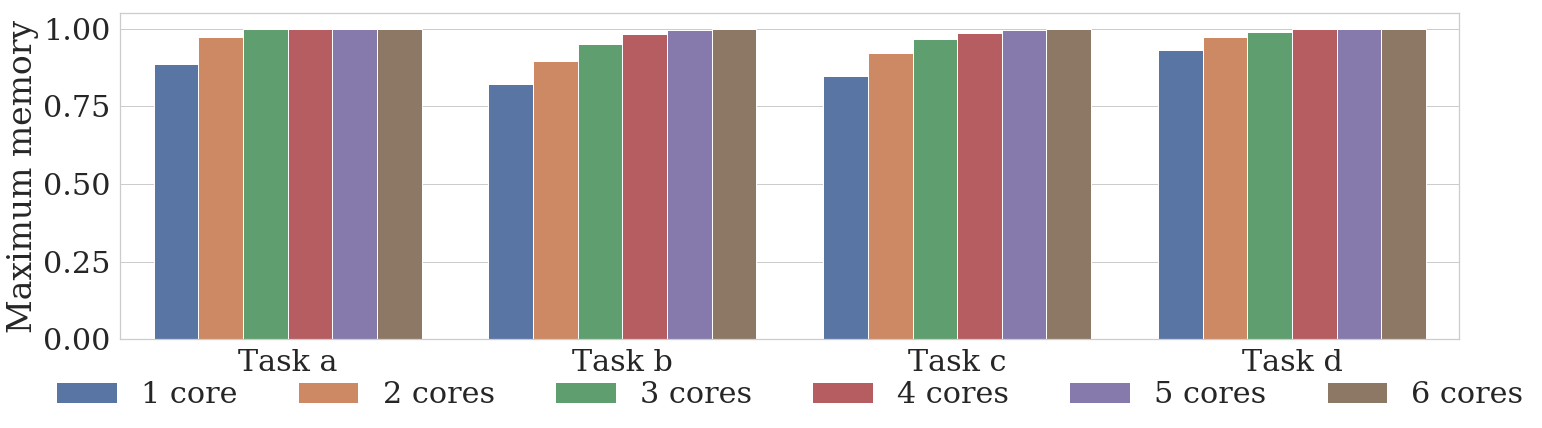

In [46]:
df_mem = pd.read_csv('./mem/df_mem.csv')
draw_maxcut_core_bar(df_mem)